In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cartwheel = pd.read_csv(r"../week3/Cartwheeldata.csv")

In [3]:
cartwheel.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [4]:
cartwheel.Gender.unique()

array(['F', 'M'], dtype=object)

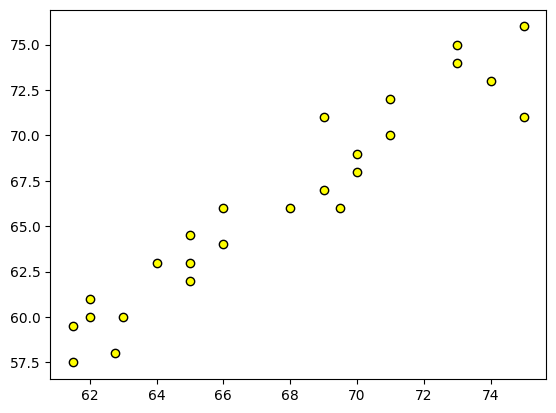

In [8]:
# Q1 Is the relationship between ‘Height’ and ‘Wingspan’ linear?

plt.plot(cartwheel.Height, cartwheel.Wingspan, linestyle = "none", mfc = "yellow", mec = "black", marker = "o")
plt.show()

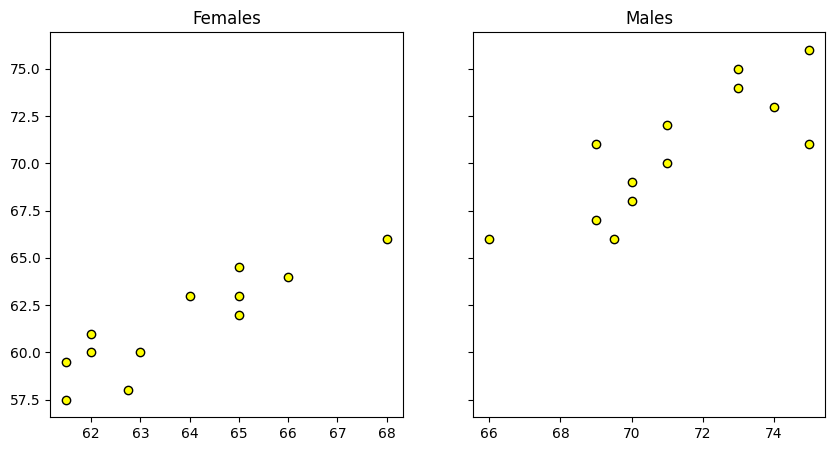

In [9]:
# Q2 Is the relationship between ‘Wingspan’ and ‘Height’ linear for each gender?

fig, (axes_0, axes_1) = plt.subplots(ncols = 2, sharey = True)
fig.set_size_inches(10, 5)

axes_0.plot(cartwheel.loc[cartwheel.Gender == 'F'].Height, cartwheel.loc[cartwheel.Gender == 'F'].Wingspan,
         linestyle = "none", mfc = "yellow", mec = "black", marker = "o")
axes_0.set_title("Females")

axes_1.plot(cartwheel.loc[cartwheel.Gender == 'M'].Height, cartwheel.loc[cartwheel.Gender == 'M'].Wingspan,
         linestyle = "none", mfc = "yellow", mec = "black", marker = "o")
axes_1.set_title("Males")

plt.show()

In [14]:
# Q3 Is the interquartile range of ‘CWDistance’ similar to ‘Wingspan’?

q1q3cwd = np.quantile(cartwheel.CWDistance, q = [.25, .75])
q1q3wsp = np.quantile(cartwheel.Wingspan, q = [.25, .75])

print(f"IQR of CWDistance is {q1q3cwd[1] - q1q3cwd[0]}")
print(f"IQR of Wingspan is {q1q3wsp[1] - q1q3wsp[0]}")

IQR of CWDistance is 22.0
IQR of Wingspan is 9.0


In [27]:
cartwheel.Glasses.unique()

array(['Y', 'N'], dtype=object)

In [42]:
cartwheel.CWDistance[:10]

0     79
1     70
2     85
3     87
4     72
5     81
6    107
7     98
8    106
9     65
Name: CWDistance, dtype: int64

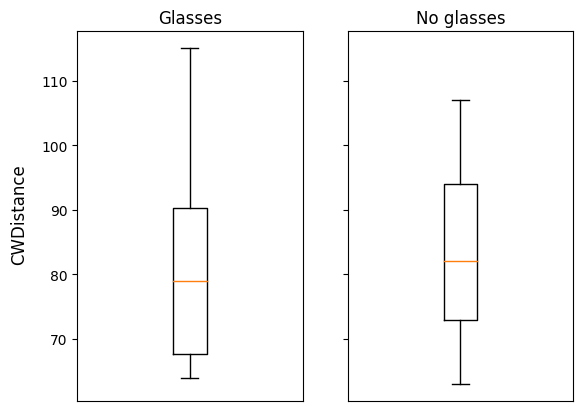

In [24]:
# Q4 Looking at the barplot of ‘Glasses’ and ‘CWDistance’, which glasses condition has a (slightly) larger estimate of cartwheel distance?

fig, (axes_0, axes_1) = plt.subplots(ncols = 2, sharey = True)
fig.supylabel("CWDistance")

axes_0.boxplot(cartwheel.CWDistance.loc[cartwheel.Glasses == 'Y'])
axes_0.set_title("Glasses")
axes_0.set_xticks([])

axes_1.boxplot(cartwheel.CWDistance.loc[cartwheel.Glasses == 'N'])
axes_1.set_title("No glasses")
axes_1.set_xticks([])

plt.show()

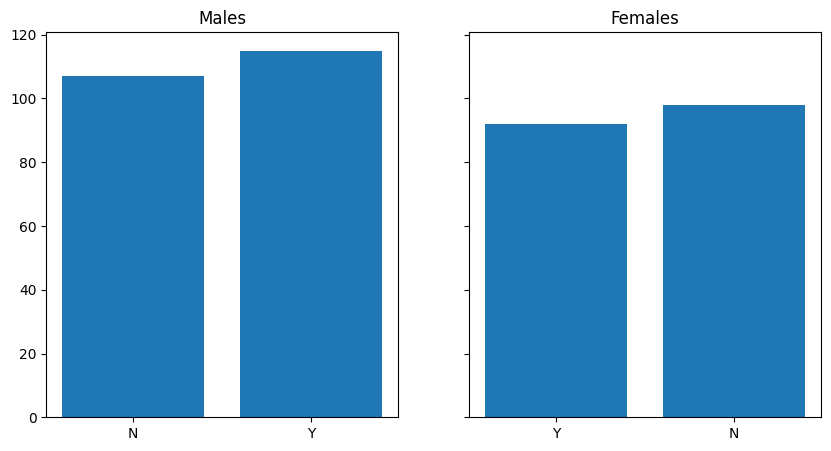

In [15]:
# Q5 Looking at the barplot of ‘Glasses’ and ‘CWDistance’ split by ‘Gender’,
# which glasses condition has a (slightly) larger estimate of cartwheel distance?

fig, (axes_0, axes_1) = plt.subplots(ncols = 2, sharey = True)
fig.set_size_inches(10, 5)

axes_0.bar(x = cartwheel.loc[cartwheel.Gender == 'M'].Glasses, height = cartwheel.loc[cartwheel.Gender == 'M'].CWDistance)
axes_0.set_title("Males")

axes_1.bar(x = cartwheel.loc[cartwheel.Gender == 'F'].Glasses, height = cartwheel.loc[cartwheel.Gender == 'F'].CWDistance)
axes_1.set_title("Females")
plt.show()